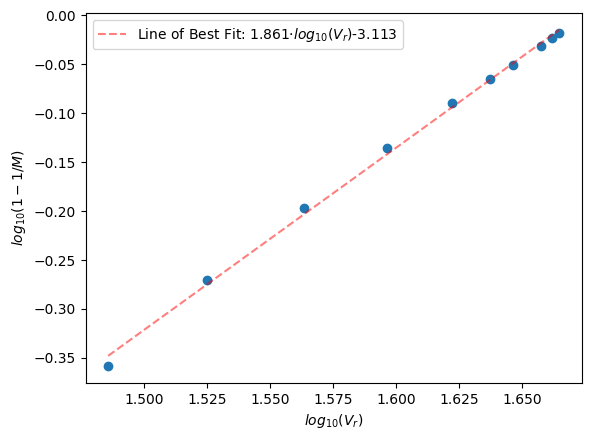

V_br = 621237.1647275737


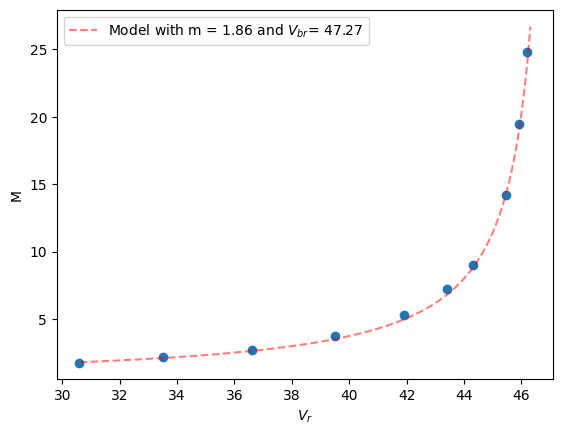

In [13]:
import numpy as np
import matplotlib.pyplot as plt
V_r = np.array([30.6, 33.5, 36.6, 39.5, 41.9, 43.4, 44.3, 45.46, 45.92, 46.21])
M =   np.array([1.78, 2.16, 2.74, 3.74, 5.34, 7.21, 9.00, 14.20, 19.50, 24.80])

V_r_log = np.log10(V_r)
y_data_log = np.log10(1-1/M)

m, b = np.polyfit(V_r_log, y_data_log, 1)
_x = np.linspace(np.min(V_r_log), np.max(V_r_log), 1000)

plt.plot(_x, m*_x + b, "r--", alpha=0.5, label=f"Line of Best Fit: {m:.3f}"+r"$\cdot log_{10}(V_r)$" + f"{b:.3f}")
plt.scatter(V_r_log,y_data_log)
plt.xlabel(r"$log_{10}(V_r)$")
plt.ylabel(r"$log_{10}(1 - 1/M)$")
plt.legend()
plt.show()

V_br = 10**(-m*b)
print(f"V_br = {V_br}")

V_br=47.27
V_r_fit = np.linspace(np.min(V_r), np.max(V_r)+0.1, 1000)
M_fit = 1/(1-(V_r_fit / V_br)**m)

plt.scatter(V_r, M)
plt.plot(V_r_fit, M_fit, "r--", alpha=0.5, label=f"Model with m = {m:.2f} and " +r"$V_{br}$" + f"= {V_br:.2f}")
plt.xlabel(r"$V_r$")
plt.ylabel("M")
plt.legend()

In [14]:
# M_fit

# Kasap 5.35

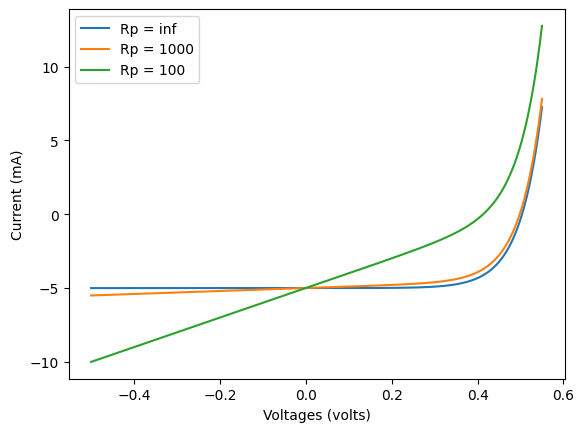

In [15]:
from scipy.constants import e as q

shunt_resistances = [float('inf'), 1000, 100]

plt.figure()
for R_p in shunt_resistances:
    V = np.linspace(-0.5, 0.55, 1000)
    I_ph = 5e-3
    I_0 = 3e-7
    eta = 2
    if R_p == float('inf'):
        I = -I_ph + I_0 * np.exp(V / (eta*0.0259))-I_0
        plt.plot(V, I*1e3, label=f"Rp = {R_p}")
    else:
        I = -I_ph + I_0 * np.exp(V / (eta*0.0259))-I_0 + V/R_p
        plt.plot(V, I*1e3, label=f"Rp = {R_p}")

plt.xlabel("Voltages (volts)")
plt.ylabel("Current (mA)")
plt.legend()


# Problem 5.36

This problem was tricky, because we are not given R_L, in fact, R_L is was will determine the voltage drop V. 

$$ I = -I_{ph} + I_{diode} = -I_{ph} + I_{0} * exp(\frac{q(V-IR_s)}{\eta
k_B T}) - I_0 $$

Sadly, we cannot solve this algebraically, so we will do so numerically by picking a value for V and minimizing the following equation over the parameter I

$$ 0  = -I_{ph} + I_{0} * exp(\frac{q(V-IR_s)}{\eta
k_B T}) - I_0 - I $$

In [16]:
def get_cost_function(V, R_s=0):
    I_ph = 10e-3
    I_0 = 25e-9
    eta=1.5
    def cost_function(I):
        return np.abs(-I_ph + I_0*np.exp((V-I*R_s) / (eta*0.0259)) - I_0 - I)
    
    return cost_function

In [17]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def calculate_IV_curves(R_s, voltage):
    # R_s = 0

    _I = np.linspace(-0.02, 0.01, 100000)
    
    # minimize(cost_function, I, method='nelder-mead')
    current = np.zeros_like(voltage)
    for i, v in enumerate(voltage):
        cost_function = get_cost_function(v, R_s)
        current[i] = _I[np.argmin(cost_function(_I))]

    return current, voltage

Text(0, 0.5, 'current')

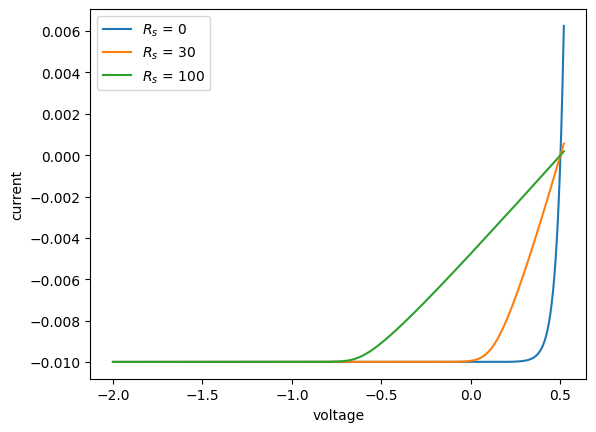

In [24]:
voltage = np.linspace(-2, 0.52, 1000)
# voltage = np.linspace(-2, 10.0, 1000)
for R_s in [0, 30, 100]:
    current, voltage = calculate_IV_curves(R_s, voltage)
    plt.plot(voltage, current, label=r"$R_s$ = " +f"{R_s}")

plt.legend()
plt.xlabel("voltage")
plt.ylabel("current")

# Problem 5.37

In [19]:
def intensity(alpha):
    return 1.353*(0.7)**((1/np.sin(alpha))**0.678)

0.9470997168756579
0.9470999999999999


/tmp/ipykernel_10380/3134206395.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1.353*(0.7)**((1/np.sin(alpha))**0.678)


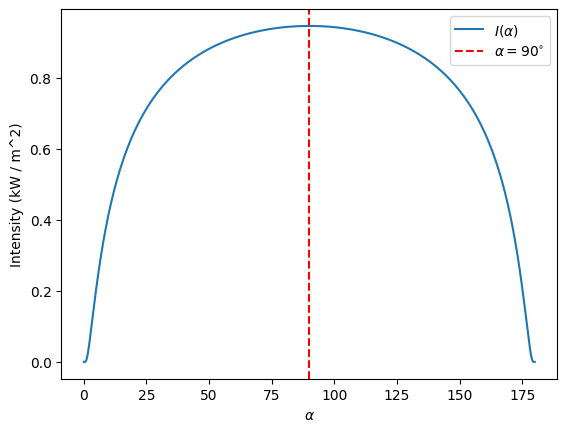

In [20]:
alpha = np.linspace(0, np.pi, 1000)

plt.plot(alpha*180/np.pi, intensity(alpha), label=r"$I(\alpha)$")
plt.axvline(90, color="red", linestyle="--", label=r"$\alpha=90^{\circ}$")
plt.legend(loc="upper right")

plt.xlabel(r"$\alpha$")
plt.ylabel("Intensity (kW / m^2)")

print(np.max(intensity(alpha)))
print(np.max(intensity(np.pi/2)))